In [1]:
import datetime              as dt
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt

In [2]:
#downloading product orders dataset. to first trials.
#do we have to reference the 'read_csv'direct to the github folder?
df = pd.read_csv('https://bsa-correlation-one.s3.amazonaws.com/202003131045_orders.csv')
df.head(5)

/Users/leonardogomescardoso/opt/anaconda3/envs/case_7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,purchase_timestamp,seller_id,product_gtin,product_sku,channel_slug,channel_store,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip,origin_state,origin_city,destination_zip,destination_state,destination_city
0,2019-07-20 11:19:43,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6952202281890,PRDWRHUYLLMFX2U0,mercadolivre,mercadolivre,82.99,20.86,0.0,0.20,0.20,1109010,SP,SAO PAULO,89265575,SC,Jaraguá do Sul
1,2019-11-11 20:43:23,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,119.90,0.00,0.0,0.20,0.20,1109010,SP,SAO PAULO,06040470,SP,Osasco
2,2020-03-01 16:25:00,c58b83e5-52de-43fe-8399-a7bc312e2aa5,7898907175302,PRDKTDU50G9FVV57,cnova,ex,39.90,14.24,0.0,0.19,0.19,20910970,RJ,RIO DE JANEIRO,22260210,RJ,Rio de Janeiro
3,2020-02-04 12:04:10,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,130.95,0.00,0.0,0.20,0.20,1109010,SP,SAO PAULO,89062100,SC,Blumenau
4,2018-12-14 13:52:19,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,128.99,21.51,0.0,0.20,0.20,1109010,SP,SAO PAULO,66055000,PA,Belém


In [3]:
#checking range of dates aka 'purchase_timestamp'
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'])  
df['date'] = df['purchase_timestamp'].dt.date
df.sort_values('purchase_timestamp').iloc[[0,-1]]

,purchase_timestamp,seller_id,product_gtin,product_sku,channel_slug,channel_store,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip,origin_state,origin_city,destination_zip,destination_state,destination_city,date
24613,2015-09-23 13:00:13,ae3537b0-1bba-4690-8219-d4be662e1f6a,7899893323067,OLT1FE68051DD0E,cnova,cnova,168.00,0.0,0.0,0.20,0.00,5138100,SP,São Paulo,95720000,RS,Garibaldi,2015-09-23
36494,2020-03-13 07:37:36,5fc08652-2e29-45c8-a967-428d73dd35e0,7897181941436,PRD4ZU8AMTULO709,mercadolivre,mercadolivre,94.05,0.0,0.0,0.16,0.16,6422120,SP,Barueri,24210200,RJ,Niterói,2020-03-13


In [4]:
df.describe()

,product_gtin,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip
count,4.099700e+04,40997.000000,40997.000000,40997.000000,40997.000000,40997.000000,4.099700e+04
mean,7.770114e+12,110.292697,18.431204,0.110380,0.192374,0.188754,2.015039e+07
std,3.374423e+12,139.258356,17.080063,1.511568,0.016219,0.030310,2.292874e+07
min,1.789851e+11,6.920000,0.000000,0.000000,0.090000,0.000000,1.021200e+06
25%,7.892509e+12,35.130000,8.530000,0.000000,0.190000,0.190000,4.782020e+06
50%,7.898555e+12,71.900000,16.220000,0.000000,0.200000,0.200000,1.308726e+07
75%,7.908244e+12,134.900000,23.110000,0.000000,0.200000,0.200000,2.494152e+07
max,7.891190e+13,5079.940000,344.700000,72.900000,0.250000,0.250000,9.950000e+07


We can see that there's no NaN in our dataset.

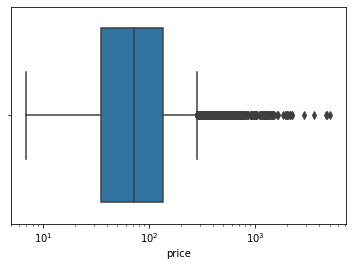

In [5]:
g = sns.boxplot(df['price'])
g.set_xscale('log')

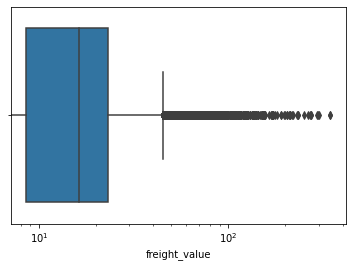

In [6]:
g = sns.boxplot(df['freight_value'])
g.set_xscale('log')

The histograms and boxplots indicates a high dispersion of price and freight. For price, mostly of data are below 200 reais and for freight below 40 reais. Booth information were expected once Olist sell any kind of product, at any value. Perhaps a good approach to understand the data would be normalize them by each product_gtin.

/Users/leonardogomescardoso/opt/anaconda3/envs/case_7.1/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/leonardogomescardoso/opt/anaconda3/envs/case_7.1/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6895., 6043., 4177., 3038., 2796., 4492., 2095., 2825.,  884.,
        6220.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

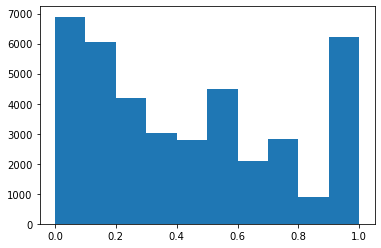

In [74]:
#groupby gtin, calculating min and max to normalize prices and check the distribution.
df_min = df.groupby(['product_gtin'])['price'].min()
df_max = df.groupby(['product_gtin'])['price'].max()
df_norm = df[{'product_gtin','price'}]
df_norm = df_norm.merge(df_max, on = 'product_gtin')
df_norm = df_norm.merge(df_min, on = 'product_gtin')
#price_x == original price, price_y == max price, price == min price. I dont know why its not working.
df_norm['price_norm'] = (df_norm['price_x']-df_norm['price'])/(df_norm['price_y']- df_norm['price'])
plt.hist(df_norm['price_norm'])

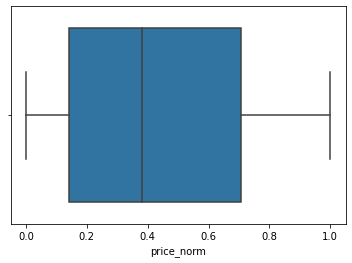

In [77]:
g = sns.boxplot(df_norm['price_norm'])


considering prices of all data range, we can see they are close the minimum.

In [75]:
#Looking for the most frequent orders bby gtin.
#Here, we don't have the information of how many units was each order.
#As at least one product was sold at each order, I considered that I sell one product by order.
#I choose an random column to count the rows and identify how many orders we have for each gtin
df_ordersbygtin = df.groupby(by=['product_gtin'])['seller_id'].count().sort_values(ascending = False).to_frame().rename(columns={'seller_id': 'n_orders'})
df_ordersbygtin = df_ordersbygtin.reset_index()
df_ordersbygtin['share'] = df_ordersbygtin['n_orders']/df_ordersbygtin['n_orders'].sum() * 100
df_ordersbygtin['rank'] = df_ordersbygtin['share'].rank(method = 'first', ascending = False).astype(int)
df_ordersbygtin.head()

,product_gtin,n_orders,share,rank
0,8800550956404,2859,6.973681,1
1,7899495703106,2079,5.071103,2
2,7909389621864,1999,4.875967,3
3,7895099385786,1652,4.029563,4
4,7892049060281,1614,3.936873,5


In [89]:
df['product_gtin'].nunique()

647

In [88]:
df_ordersbygtin['share'][df_ordersbygtin['rank'] <= 20].sum()

48.86455106471205

the top 20 (3%) products concentrates almost 50% of the orders

In [84]:
df_ordersbyrev = df.groupby(by=['product_gtin'])['price'].sum().sort_values(ascending = False).to_frame().rename(columns={'price': 'revenue'})
df_ordersbyrev = df_ordersbyrev.reset_index()
df_ordersbyrev['share'] = df_ordersbyrev['revenue']/df_ordersbyrev['revenue'].sum() * 100
df_ordersbyrev['rank'] = df_ordersbyrev['share'].rank(method = 'first', ascending = False).astype(int)
df_ordersbyrev['share'][df_ordersbyrev['rank'] <= 20].sum()


52.62487671893607

The top 20 products (3%) concentrates more than 50% of revenues